# Título da Análise

## Objtetivo

...

## Metodologia

...

## Trabalhos de Melhorias

...

## A Fazer

1. 
1. 
2. 

## Resultados/Insights

#### Questão 1:

...

#### Questão 2:

...

## Próximos passos sugeridos

1. 
2. 
3. 

## Import Library

In [1]:
# bibliotecas de manipulação
import pandas as pd
import numpy as np

# bibliotecas de preprocessamento
from sklearn.preprocessing import MinMaxScaler

# bibliotecas de visualização
import matplotlib as plt
import seaborn as sns

# bibliotecas de machine learning

# outras bibliotecas
import datetime
import os
import warnings

In [2]:
# opções para o pandas
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.mode.use_inf_as_na=True
pd.options.display.max_colwidth=None

# opções para visualizações
%matplotlib inline

# opções para Jupyter notebook
warnings.filterwarnings('ignore')

## Importação de bibliotecas ou classes locais

## Definição de Parâmetros

## Importação de Dados

In [55]:
# importando dados de empresas
file='../data/live-university/empresa_dummy.csv' # insira aqui o caminho completo do arquivo
df=pd.read_csv(file, header=0, sep=',', encoding='utf-8', decimal=",")

In [56]:
# importando tabela cnae
file='../data/ibge/cnae.xlsx' # insira aqui o caminho completo do arquivo
cnae=pd.read_excel(file, sheet_name='CNAE', header=0)
cnae=cnae[['Classe', 'Nome Classe', 'Subclasse', 'Nome Subclasse']]
cnae['Subclasse']=cnae['Subclasse'].apply(lambda x: x.replace('-', '').replace('/', '')).astype('int')


# importando cnaes essenciais segundo tabela obtida do endereço a seguir:
file='../data/ibge/cnae-essencial.xlsx' # insira aqui o caminho completo do arquivo
cnae_essencial=pd.read_excel(file, sheet_name='Estrutura CNAE Classe', header=1)
cnae_essencial=cnae_essencial[['Classe','FEDERAL']]
cnae_essencial['atividade_essencial']=cnae_essencial['FEDERAL'].apply(lambda x: 1 if pd.notnull(x) else 0)
cnae_essencial.drop(columns=['FEDERAL'], inplace=True)

# marcando cnaes com atividades essenciais
cnae=cnae.merge(cnae_essencial, how='left', left_on=['Classe'], right_on=['Classe'])
cnae=cnae[['Subclasse', 'Nome Subclasse', 'atividade_essencial']]
cnae['Nome Subclasse']=cnae['Nome Subclasse'].apply(lambda x: x.upper())
cnae.rename(columns={'Subclasse': 'cnae_fiscal'}, inplace=True)
del cnae_essencial

## Pré Processamento de Dados

## Análise de Dados

In [57]:
df.head(2)

,Unnamed: 0,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,qualificacao_do_responsavel,capital_social,porte,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_do_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,qtd_func,patrimonio,lucro_ultimo_ano(mil),lucro_ultimos_5_anos,refis,risco,patrimonio_liquido
0,0,36625,2,BANCO DO BRASIL SA,NaN,2,2005-11-03,0,NaN,2038,1966-08-01,6421200,RUA,GONCALVES DIAS,20,NaN,CENTRO,38500000.0,MG,4861,MONTE CARMELO,NaN,NaN,NaN,10,0.0,5,0,NaN,NaN,0,NaN,NaN,378,4736993,-285,146,sim,NaN,274
1,1,69205,2,BANCO DO BRASIL SA,PORTEIRINHA - PORTEIRINHA (MG),2,2005-11-03,0,NaN,2038,1969-07-28,6422100,PRACA,CEL. ODILON COELHO,167,-,CENTRO,39520000.0,MG,5043,PORTEIRINHA,NaN,NaN,NaN,10,0.0,5,0,NaN,NaN,0,NaN,NaN,672,1302039,127,55,sim,NaN,2226


In [58]:
# analisando campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72169 entries, 0 to 72168
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   72169 non-null  int64  
 1   cnpj                         72169 non-null  int64  
 2   identificador_matriz_filial  72169 non-null  int64  
 3   razao_social                 72169 non-null  object 
 4   nome_fantasia                36717 non-null  object 
 5   situacao_cadastral           72169 non-null  int64  
 6   data_situacao_cadastral      72169 non-null  object 
 7   motivo_situacao_cadastral    72169 non-null  int64  
 8   nome_cidade_exterior         21 non-null     object 
 9   codigo_natureza_juridica     72169 non-null  int64  
 10  data_inicio_atividade        72169 non-null  object 
 11  cnae_fiscal                  72169 non-null  int64  
 12  descricao_tipo_logradouro    63535 non-null  object 
 13  logradouro      

In [59]:
# checando variáveis únicas
df.nunique()

Unnamed: 0                     72169
cnpj                           72169
identificador_matriz_filial        2
razao_social                   71484
nome_fantasia                  35537
situacao_cadastral                 5
data_situacao_cadastral         7508
motivo_situacao_cadastral         36
nome_cidade_exterior              16
codigo_natureza_juridica          57
data_inicio_atividade           9290
cnae_fiscal                     1092
descricao_tipo_logradouro        120
logradouro                     38960
numero                          6281
complemento                    13392
bairro                         17264
cep                            37998
uf                                28
codigo_municipio                4905
municipio                       4683
ddd_telefone_1                 34003
ddd_telefone_2                  9801
ddd_fax                        13684
qualificacao_do_responsavel       24
capital_social                   912
porte                              4
o

In [60]:
# removendo variáveis unicas ou que não agregam para previsão
remover_features=['Unnamed: 0', 'razao_social', 'nome_fantasia','descricao_tipo_logradouro', 'logradouro', 'numero',
                 'complemento', 'bairro', 'cep', 'codigo_municipio', 'municipio', 'ddd_telefone_1',
                 'ddd_telefone_2', 'ddd_fax']
df.drop(columns=remover_features, inplace=True)

In [61]:
# checando campos em branco
df.isna().sum()/df.shape[0]

cnpj                           0.000000
identificador_matriz_filial    0.000000
situacao_cadastral             0.000000
data_situacao_cadastral        0.000000
motivo_situacao_cadastral      0.000000
nome_cidade_exterior           0.999709
codigo_natureza_juridica       0.000000
data_inicio_atividade          0.000000
cnae_fiscal                    0.000000
uf                             0.000000
qualificacao_do_responsavel    0.000000
capital_social                 0.000000
porte                          0.000000
opcao_pelo_simples             0.000000
data_opcao_pelo_simples        0.597182
data_exclusao_do_simples       0.801078
opcao_pelo_mei                 0.000000
situacao_especial              0.999307
data_situacao_especial         0.999307
qtd_func                       0.000000
patrimonio                     0.000000
lucro_ultimo_ano(mil)          0.000000
lucro_ultimos_5_anos           0.000000
refis                          0.000000
risco                          1.000000


### 1. TRATANDO DADOS DAS EMPRESAS

In [62]:
# removendo colunas em branco
remover_features=['nome_cidade_exterior', 'data_exclusao_do_simples', 'situacao_especial', 'data_situacao_especial']
df.drop(columns=remover_features, inplace=True)


# modificando data types para cálculo de datas
df['data_inicio_atividade']=pd.to_datetime(df['data_inicio_atividade'], yearfirst=True)
df['anos_atividade']=round(
    (pd.to_datetime('2020-08-31', yearfirst=True) - df['data_inicio_atividade'])/np.timedelta64(1, 'Y'), 0).astype('int')


# adicionando marcação de cnaes de atividades essenciais
df=df.merge(cnae, how='left', left_on=['cnae_fiscal'], right_on=['cnae_fiscal'])
# assumindo cnaes não localizados como 0 (zero)
df['atividade_essencial'].fillna(0, inplace=True)

# removendo colunas do dataframe de empresas pós join
remover_features=['cnpj', 'situacao_cadastral', 'motivo_situacao_cadastral', 'data_opcao_pelo_simples'
                  , 'data_inicio_atividade', 'data_situacao_cadastral', 'cnae_fiscal']
df.drop(columns=remover_features, inplace=True)
df.rename(columns={'Nome Subclasse': 'cnae_fiscal'}, inplace=True)

### 2. GERANDO FEATURES ADICIONAIS

In [63]:
# calculando alavancagem
df['alavancagem']=round(df.apply(lambda x: x['patrimonio']/x['patrimonio_liquido'], axis=1), 0)

# calculando o lucro por funcionário
df['lucro_por_funcionario']=round(df.apply(lambda x: x['lucro_ultimo_ano(mil)']*1000/x['qtd_func'], axis=1), 0)

# rentabilidade do ativo
df['rentabilidade_ativo']=round(df.apply(lambda x: x['lucro_ultimo_ano(mil)']*1000/x['patrimonio'], axis=1), 4)

# rentabilidade do patrimônio líquido
df['rentabilidade_patrimonio_liquido']=round(df.apply(lambda x:
                                                      x['lucro_ultimo_ano(mil)']/x['patrimonio_liquido'], axis=1), 4)

# índice comparativo de comparabilidade do lucro do último ano com o lucro dos últimos 5 anos (1=Aumentando, 0=Reduzindo)
df['indicador_crescimento_lucro']=df.apply(
    lambda x: 1 if x['lucro_ultimo_ano(mil)'] > (x['lucro_ultimos_5_anos']/5) else 0, axis=1)

In [64]:
# calculando os quantis das colunas criadas
quantis=['alavancagem', 'lucro_por_funcionario', 'rentabilidade_ativo', 'rentabilidade_patrimonio_liquido']

for i in quantis:
    print('Quantis da feature: {}'.format(i))
    print(df[i].quantile([0.2, 0.4, 0.6, 0.8, 1]), '\n')

Quantis da feature: alavancagem
0.2        400.0
0.4        799.0
0.6       1248.0
0.8       2498.0
1.0    3196140.0
Name: alavancagem, dtype: float64 

Quantis da feature: lucro_por_funcionario
0.2      -622.0
0.4      -200.0
0.6       201.0
0.8       628.0
1.0    476000.0
Name: lucro_por_funcionario, dtype: float64 

Quantis da feature: rentabilidade_ativo
0.2      -0.12490
0.4      -0.04010
0.6       0.04020
0.8       0.12524
1.0    9469.38780
Name: rentabilidade_ativo, dtype: float64 

Quantis da feature: rentabilidade_patrimonio_liquido
0.2     -0.1248
0.4     -0.0407
0.6      0.0399
0.8      0.1246
1.0    428.0000
Name: rentabilidade_patrimonio_liquido, dtype: float64 



In [65]:
# análise de variáveis binárias
binarias=['atividade_essencial', 'refis', 'indicador_crescimento_lucro']

for i in binarias:
    print('Variável: {}'.format(i))
    print(df[i].value_counts(), '\n')

Variável: atividade_essencial
0.0    37750
1.0    34419
Name: atividade_essencial, dtype: int64 

Variável: refis
sim    72169
Name: refis, dtype: int64 

Variável: indicador_crescimento_lucro
0    36086
1    36083
Name: indicador_crescimento_lucro, dtype: int64 



Como a variável 'refis' só tem uma categoria ela não ajuda a decidir acerca do score, e pode ser retirada.

In [66]:
df.head()

,identificador_matriz_filial,codigo_natureza_juridica,uf,qualificacao_do_responsavel,capital_social,porte,opcao_pelo_simples,opcao_pelo_mei,qtd_func,patrimonio,lucro_ultimo_ano(mil),lucro_ultimos_5_anos,refis,risco,patrimonio_liquido,anos_atividade,cnae_fiscal,atividade_essencial,alavancagem,lucro_por_funcionario,rentabilidade_ativo,rentabilidade_patrimonio_liquido,indicador_crescimento_lucro
0,2,2038,MG,10,0.0,5,0,0,378,4736993,-285,146,sim,NaN,274,54,BANCOS COMERCIAIS,1.0,17288.0,-754.0,-0.0602,-1.0401,0
1,2,2038,MG,10,0.0,5,0,0,672,1302039,127,55,sim,NaN,2226,51,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",1.0,585.0,189.0,0.0975,0.0571,1
2,2,2038,ES,10,0.0,5,0,0,769,2805400,72,-644,sim,NaN,1018,47,BANCOS COMERCIAIS,1.0,2756.0,94.0,0.0257,0.0707,1
3,2,2038,SP,10,0.0,5,0,0,926,4352454,394,286,sim,NaN,2875,46,BANCOS COMERCIAIS,1.0,1514.0,425.0,0.0905,0.1370,1
4,2,2038,PA,10,0.0,5,0,0,583,1318002,83,-382,sim,NaN,4735,44,BANCOS COMERCIAIS,1.0,278.0,142.0,0.0630,0.0175,1


### 3.PARAMETRIZANDO O DICIONÁRIO DE VALORES DE SCORAGEM

In [67]:
# parâmetros de pontos de score em função das faixas de corte das variáveis. Parametrizar do menor para o maior.
# a função de cálculo irá comparar o valor do dataframe com a chave do dicionário utilizando "<".
dic_features_score={
    'anos_atividade':{3: 0, 9: 2, 21: 5, 31: 8, 999999: 10},
    'atividade_essencial':{1: 0, 999999: 5},
    'lucro_por_funcionario': {-622: 0, -200: 2, 201: 4, 628: 6, 999999: 8},
    'rentabilidade_ativo': {-0.12490: 0, -0.04010: 3, 0.04020: 6, 0.12524: 9, 999999: 12},
    'rentabilidade_patrimonio_liquido': {-0.1248: 0, -0.0407: 3, 0.0399: 6, 0.1246: 9, 999999: 12},
    'indicador_crescimento_lucro': {1: 0, 999999: 5}
}

# função para calcular o score a partir do dicionário
def calcularScore(df, features):
    score=0
    for i in features:
        valor_dataframe = df[i]
        for valor_referencia, pontos in dic_features_score[i].items():
            if valor_dataframe < valor_referencia:
                score+=pontos
                break
    return score

### 4.CALCULANDO RISCO EM FUNÇÃO DOS PARÂMETROS DO DICIONÁRIO DE SCORAGEM

In [73]:
# Quanto maior o score da empresa, maior as condições economico financeiras para honrar a dívida
variaveis=dic_features_score.keys()
df2=df.copy()
df2=df2[(df2['codigo_natureza_juridica']>2011) & (df2['codigo_natureza_juridica']<3034)]
df2['risco']=df2.apply(lambda x: calcularScore(x, variaveis), axis=1)
scaler = MinMaxScaler()
scaler.fit(df2[['risco']])
df2['risco'] = scaler.transform(df2[['risco']])
df2['TARGET']=df2['risco'].apply(lambda x: 1 if x>=0.8 else 0)

,0,1,2,3,4
index,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
risco,0.12668,0.266213,0.179318,0.225874,0.201915


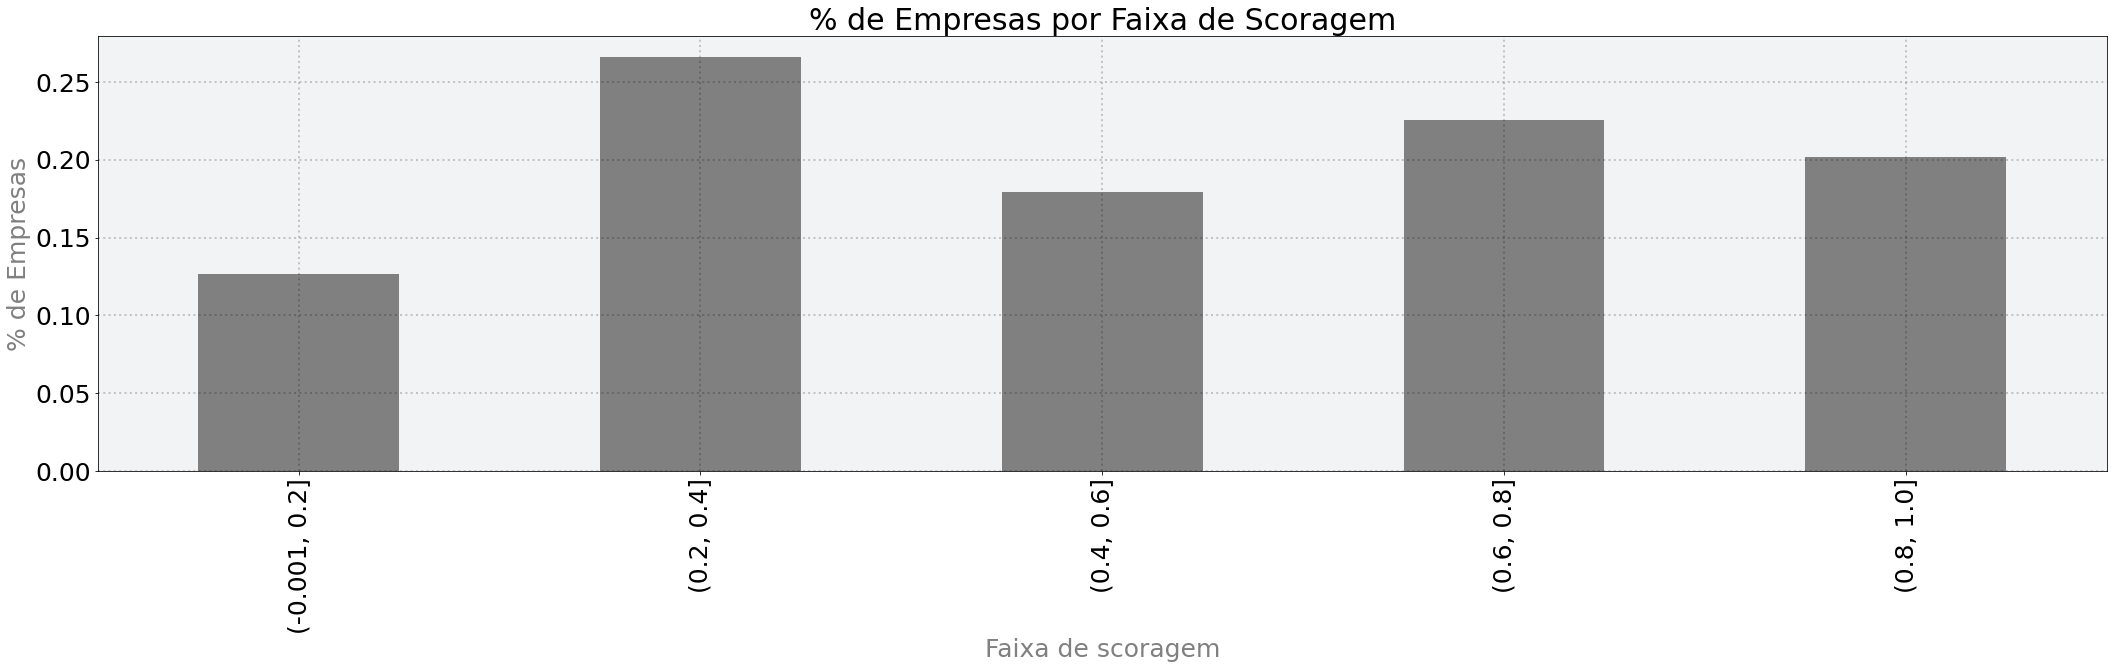

In [74]:
out=pd.cut(df2['risco'], bins=5).value_counts(sort=False)
out=out/out.sum()
ax = out.plot.bar(rot=90, color='gray',figsize=(36,8))
ax.set_facecolor("#F1F3F4")
ax.grid(color="black", alpha=.2, linewidth=2, linestyle=":", zorder=0)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.set_title('% de Empresas por Faixa de Scoragem', fontsize=30)
ax.get_yaxis().set_visible(True)
ax.set_xlabel(xlabel="Faixa de scoragem", fontsize=25, color='gray')
ax.set_ylabel(ylabel="% de Empresas", fontsize=25, color='gray')
out.reset_index().T

In [75]:
df2['TARGET'].value_counts(normalize=True)

0    0.798085
1    0.201915
Name: TARGET, dtype: float64

### ENRIQUECIMENTO

In [54]:
path='../data/pgfn/divida-geral'
pgfn=pd.DataFrame()
for file in os.listdir(path):
    tmp=pd.read_csv(path+file, header=0, sep=';', encoding='latin1')
    tmp=tmp[['CPF_CNPJ', 'TIPO_PESSOA', 'INDICADOR_AJUIZADO', 'VALOR_CONSOLIDADO']]
    tmp=tmp[(tmp['INDICADOR_AJUIZADO']=='SIM') & (tmp['TIPO_PESSOA']=='Pessoa jurídica')]
    tmp=tmp.groupby('CPF_CNPJ').agg({'VALOR_CONSOLIDADO': 'sum'}).reset_index()
    tmp['CPF_CNPJ']=tmp['CPF_CNPJ'].apply(lambda x: x.replace('.','').replace('/','').replace('-',''))
    tmp['CPF_CNPJ']=tmp['CPF_CNPJ'].astype('int64')
    pgfn.append(tmp)

['arquivo_lai_SIDA_AC_202006.csv',
 'arquivo_lai_SIDA_AL_202006.csv',
 'arquivo_lai_SIDA_AM_202006.csv',
 'arquivo_lai_SIDA_AP_202006.csv',
 'arquivo_lai_SIDA_BA_202006.csv',
 'arquivo_lai_SIDA_CE_202006.csv',
 'arquivo_lai_SIDA_DF_202006.csv',
 'arquivo_lai_SIDA_ES_202006.csv',
 'arquivo_lai_SIDA_GO_202006.csv',
 'arquivo_lai_SIDA_MA_202006.csv',
 'arquivo_lai_SIDA_MG_202006.csv',
 'arquivo_lai_SIDA_MS_202006.csv',
 'arquivo_lai_SIDA_MT_202006.csv',
 'arquivo_lai_SIDA_PA_202006.csv',
 'arquivo_lai_SIDA_PB_202006.csv',
 'arquivo_lai_SIDA_PE_202006.csv',
 'arquivo_lai_SIDA_PI_202006.csv',
 'arquivo_lai_SIDA_PR_202006.csv',
 'arquivo_lai_SIDA_RJ_202006.csv',
 'arquivo_lai_SIDA_RN_202006.csv',
 'arquivo_lai_SIDA_RO_202006.csv',
 'arquivo_lai_SIDA_RR_202006.csv',
 'arquivo_lai_SIDA_RS_202006.csv',
 'arquivo_lai_SIDA_SC_202006.csv',
 'arquivo_lai_SIDA_SE_202006.csv',
 'arquivo_lai_SIDA_SP_202006.csv',
 'arquivo_lai_SIDA_TO_202006.csv',
 'processado']

### Pré-processamento

In [87]:
df_processamento.head()

,identificador_matriz_filial,codigo_natureza_juridica,uf,qualificacao_do_responsavel,capital_social,porte,opcao_pelo_simples,opcao_pelo_mei,qtd_func,patrimonio,lucro_ultimo_ano(mil),lucro_ultimos_5_anos,refis,risco,patrimonio_liquido,anos_atividade,cnae_fiscal,atividade_essencial,alavancagem,lucro_por_funcionario,rentabilidade_ativo,rentabilidade_patrimonio_liquido,indicador_crescimento_lucro,TARGET
0,2,2038,MG,10,0.0,5,0,0,378,4736993,-285,146,sim,18,274,54,BANCOS COMERCIAIS,1.0,17288.0,-754.0,-0.0602,-1.0401,0,0
1,2,2038,MG,10,0.0,5,0,0,672,1302039,127,55,sim,42,2226,51,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",1.0,585.0,189.0,0.0975,0.0571,1,0
2,2,2038,ES,10,0.0,5,0,0,769,2805400,72,-644,sim,39,1018,47,BANCOS COMERCIAIS,1.0,2756.0,94.0,0.0257,0.0707,1,0
3,2,2038,SP,10,0.0,5,0,0,926,4352454,394,286,sim,47,2875,46,BANCOS COMERCIAIS,1.0,1514.0,425.0,0.0905,0.1370,1,0
4,2,2038,PA,10,0.0,5,0,0,583,1318002,83,-382,sim,39,4735,44,BANCOS COMERCIAIS,1.0,278.0,142.0,0.0630,0.0175,1,0
